<a href="https://colab.research.google.com/github/KeniaEsparza/TI_1_Practica2_EsparzaKenia/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Esparza Duran Kenia Jaqueline

**e-mail:** kenia.esparza5866@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

from pygame.math import Vector2
import pandas as pd
import pickle
from scipy.stats import levy_stable

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [3]:
parameters_levy = [0.1,0.5,1.0,1.9]
beta = 0
m = 3.0

figure = go.Figure()

rango_x = np.linspace(-10,10,400)

for parameter in parameters_levy:
    densidad_probabilidad = levy_stable.pdf(rango_x, parameter, beta, scale=m)
    figure.add_trace(go.Scatter(x=rango_x, y=densidad_probabilidad, mode='lines', name=f'Alpha = {parameter}'))

figure.update_layout(
    title='Distribuciones Lévy Stable para Diferentes Alpha',
    xaxis_title='X',
    yaxis_title='Densidad de Probabilidad',
    legend_title='Valor de Alpha'
)

figure.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.

<bound method Figure.show of <Figure size 1000x500 with 1 Axes>>

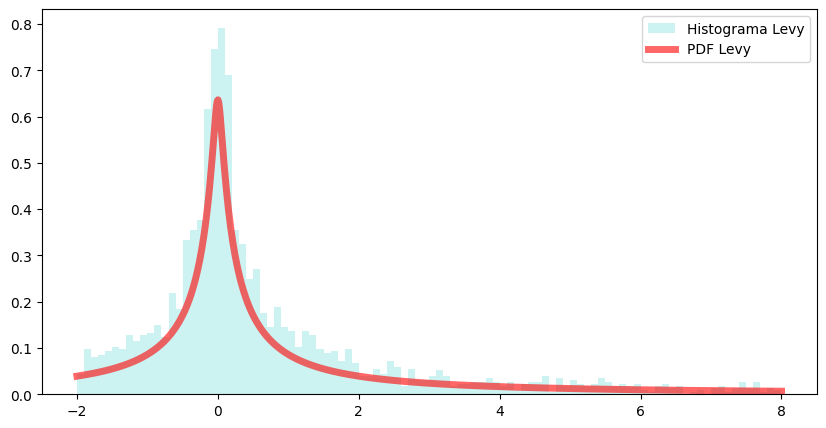

In [4]:
parameters_levy = {
    "alpha": 0.5,
    "beta": 0,
    "loc": 0,
    "scale": 1
}

tamanio_muestra = 3500

valores_aleatorios = levy_stable.rvs(parameters_levy["alpha"],
parameters_levy["beta"],
parameters_levy["loc"], parameters_levy["scale"],
size=tamanio_muestra)

figure,eje = plt.subplots(figsize=(10,5))

eje.hist(valores_aleatorios,bins=100,density=True,histtype='stepfilled',
         alpha=0.2,color='c',range=(-2,8),label='Histograma Levy')

dominio_auxiliar = np.linspace(-2,8,1000)
pdf_levy = levy_stable.pdf(dominio_auxiliar, parameters_levy["alpha"], parameters_levy["beta"],
                           parameters_levy["loc"], parameters_levy["scale"])
eje.plot(dominio_auxiliar, pdf_levy, 'r-', lw=5, alpha=0.6, label='PDF Levy')

eje.legend(loc='best', frameon = True)

figure.show

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [5]:
def levy_flight(steps, alpha=1.5):
    #Generar angulos y pasos
    angles = 2 * np.pi * np.random.rand(steps)
    step_sizes = np.random.pareto(alpha,steps) + 1

    #Inicializar trayectoria
    trajectory = [Vector2(0, 0)]

    #Generar trayectoria
    for step in step_sizes:
        angle = angles[len(trajectory)-1]
        displacement = Vector2(step * np.cos(angle), step * np.sin(angle))
        trajectory.append(trajectory[-1] + displacement)
    return trajectory

steps = 1000
trajectory = levy_flight(steps)

#Guardar trayectoria
df = pd.DataFrame([(vec.x, vec.y) for vec in trajectory], columns=['x', 'y'])

fig = go.Figure(data=[go.Scatter3d(x=df.index,y=df['x'], z= df['y'], mode='lines')])
fig.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.

In [ ]:
def generate_crw(n_steps,cauchy_coeff):
    position = Vector2(0,0)
    trajectory = [position]

    for _ in range(n_steps):
        angle = np.random.uniform(0,2*np.pi)
        step = Vector2(np.cos(angle), np.sin(angle)) * cauchy_coeff
        position += step
        trajectory.append(position.copy())

    return trajectory

n_traj = 10
n_steps = 1000

trajectories = []
for i in range(n_traj):
    cauchy_coeff = np.random.uniform(0.5,1.5)
    traj = generate_crw(n_steps, cauchy_coeff)
    trajectories.append(traj)

df = pd.DataFrame({
    'trajectory_id': [i for i in range(n_traj) for _ in range(n_steps+1)],
    'step': list(range(n_steps+1))*n_traj,
    'x': [vec.x for traj in trajectories for vec in traj],
    'y': [vec.y for traj in trajectories for vec in traj]
})

fig = go.Figure(data=[go.Scatter3d(
    x=df[df['trajectory_id'] == i]['step'],
    y=df[df['trajectory_id'] == i]['x'],
    z=df[df['trajectory_id'] == i]['y'],
    mode='lines',
    name=f'Trayectoria {i+1}'
)for i in range(n_traj)])

fig.show()

with open('trayectorias.pkl', 'wb') as f:
  pickle.dump(df,f)